In [1]:
!head -n 3 /home/chen/chengxu/LSHVec-master/new_data/newdata.fa
!python /home/chen/chengxu/LSHVec-master/scripts/fastseq/hashSeq.py -i /home/chen/chengxu/LSHVec-master/new_data/newdata.fa --hash lsh -o /home/chen/chengxu/LSHVec-master/new_data/testnewdata.fnv -k 15


1	380669_Viruses	TCGAGATACCAGATGGAAATCCTCCAGAGGTATTATCGGAAGTATGGAGGTAGACTTGACAGCTGGTTCCCAGCTAGTTTATGTGGTACCTGACATTTTGCTGAGTGTGCAGGACTTCTACAACCATATAGAAGTCGTAGTCATGACACATGGCTACCAAGATTGGGTGGACGGAGAGTCAAATCTCCTAATCACGAAGGCCTTAGTCGGGAGGTTAACTAACACCTCCTATGCCCACTTCAAGTACAATGTTGAAGGTGTGGCGGACTACCTTGCAAGCAACGGCATAGTCGCCTTGGCCGGACAACGCCATACGACTACAGAACTACAAGGCCTAGACTGGAATCTCAAGCCCAAACAAAGCACTGCTCCTGTGCAGCCACAGGAGGTAACTTACAACAACAGACTCGATGGGTCTGTTACTCTCAGGTTCACGGGTTATGCTGCAACAAGGCGTCCTACCCTTGTTGAAGTTAATGAGGACGACCTGGAGGAATTTGCCGGCATGGTGAATTTCTATGATGACTCTAGCCCGTTGCTATGCACAGAAATCCTAGAGGAGGAAGATGATGAGGACCTTTGGGTCCCGGTGCCTCCCACCTGTAGAGCATCACCCTATTCAGATGCAGAAGAGGAATTTCTTCAGAACCTCTTCTCAGCAGGTTTTACGCCTGCCACTGAGGAACAGGATATGGAGTATCCTGTCAGCATCCCGATTCCCCTGTCTCCGATCTACGACACCTATCCTGAGGATGTCGTCCACACGGACCATGGCGTTCTACTTTCTGATCATGAAGTCTGGGTCCCTCCTTCCCATCCCGCGGAAGCTGGTGGGGAGCCCTGTCCTTCCACTTTTTGCGAGTATGATTCCAACATAGAGGAGCAATTCCTCTATGATTTGGAGTGCCTCTACAATGCGGAACAGAGTGATCTCGCCTCTGAAGAGGAACCTGCGACTGTAGCGGTGGGTGACGACGCTTGTG

In [2]:
!head -n 3 /home/chen/chengxu/LSHVec-master/new_data/testnewdata.fnv

1466143 1524391 3331439 1778724 1191734 75500 971685 1699687 280174 1246078 811807 230763 68478 199533 1516220 3285766 2946703 1762103 1880860 1248869 1210656 1372474 1188153 69627 131951 1245829 1752862 1779260 1255023 1754439 1769573 1188413 281742 1761571 1405113 155430 1778349 1196295 1860447 1181478 1175866 831754 197423 460478 1380726 1409517 200227 342762 144430 984125 1182582 1075871 1827431 781361 227371 1257262 377188 513326 1511982 764031 909979 1805439 1377998 1810286 705317 1705733 1190455 1246308 201839 422557 1205059 1805232 1279855 1246373 2029842 763755 348328 367439 1247383 1639791 724030 1005720 948031 984100 689951 1075860 1288039 783417 132065 19774 1516456 1812343 1799727 2026137 1974973 1250660 1248303 1124454 208447 1290989 1845782 1117710 1255271 754511 1511740 199469 73530 196907 203044 1256237 1245933 1871446 1667663 721511 1881870 1202817 1245230 11622 1248421 1192750 719671 1766181 1864479 1335854 157483 798782 201325 86629 1231734 1516092 2322031 658269 17

In [3]:
import numpy as np
def read_embedding(fname):
    with open(fname) as fin:
        lines=list(fin)
    assert len(lines)>1
    first_line=lines[0]
    num_word, dim_vec = [int(u) for u in first_line.split(" ")]
    assert len(lines)==num_word+1
    ret ={}
    for line in lines[1:]:
        lst = line.strip().split(" ")
        assert len(lst)==dim_vec+1, line
        if lst[0]=='</s>': continue
        word = int(lst[0])
        vec = np.array([float(u) for u in lst[1:]])
        ret[word]=vec
    return ret,dim_vec
embedding,dim_vec = read_embedding("/home/chen/chengxu/LSHVec-master/new_data/embedding/newdata.vec")
seqvectors = []
with open("/home/chen/chengxu/LSHVec-master/new_data/testnewdata.fnv") as fin:
    lines = list(fin)
for i,line in enumerate(lines):
    words = [int(u) for u in line.strip().split(" ")]
    vec = [embedding[u] for u in words if u in embedding]
    seqvectors.append(np.mean(vec,0) if len(vec)>0 else None)

In [4]:
import pandas as pd
seqs = pd.read_csv("/home/chen/chengxu/LSHVec-master/new_data/newdata.fa",sep='\t', header=None, usecols=[0,1],index_col=0)
seqs.columns=['id']
seqs['special'] = seqs['id'].apply(lambda x: x.split("_")[1])
seqs['vec']=seqvectors
seqs.head()

,id,special,vec
0,,,
1,380669_Viruses,Viruses,"[0.2210316496575342, -0.03013245171232881, -0...."
2,264076_Viruses,Viruses,"[0.21732524169381107, 0.010617719348534204, -0..."
3,218387_Viruses,Viruses,"[0.14455471098484857, -0.04853253594696967, -0..."
4,11569_Viruses,Viruses,"[0.14419231481605357, -0.020707891973244158, -..."
5,204873_Viruses,Viruses,"[0.16895196560606043, -0.04341249704545455, -0..."


CPU times: user 529 ms, sys: 290 ms, total: 819 ms
Wall time: 232 ms
['Viruses', 'Archaea', 'Bacteria', 'Eukaryota']


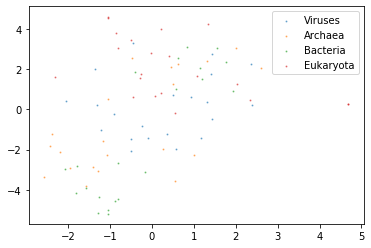

In [6]:
import matplotlib.pyplot as plt
from MulticoreTSNE import MulticoreTSNE as TSNE
#seqss=seqs.sample(5000,replace=False)
tsne = TSNE(n_components=2, perplexity=100, n_jobs=8)
X=np.array(list(seqs['vec'].values))
X.shape
%time Y = tsne.fit_transform(X)
labels=seqs['special'].values
legends=list(set(labels))
print (legends)
for label in legends:
    plt.scatter(Y[labels==label][:,0],Y[labels==label][:,1],alpha=0.5,s=1)
plt.legend(legends)

